# || The Sparks Foundation || (GRIPJUNE21) 

# Author: Shubh Dholakiya
## (Data Science and Business Analytics Intern)

## Task-2:
## Prediction using Unsupervised ML from IRIS dataset.

- Importing Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

- Read IRIS dataset.

In [ ]:
file = '/content/drive/MyDrive/Task 2 Sparks/Iris - Iris.csv'
df = pd.read_csv(file)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail(6)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.shape

(150, 6)

In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


# Visulaize correlation

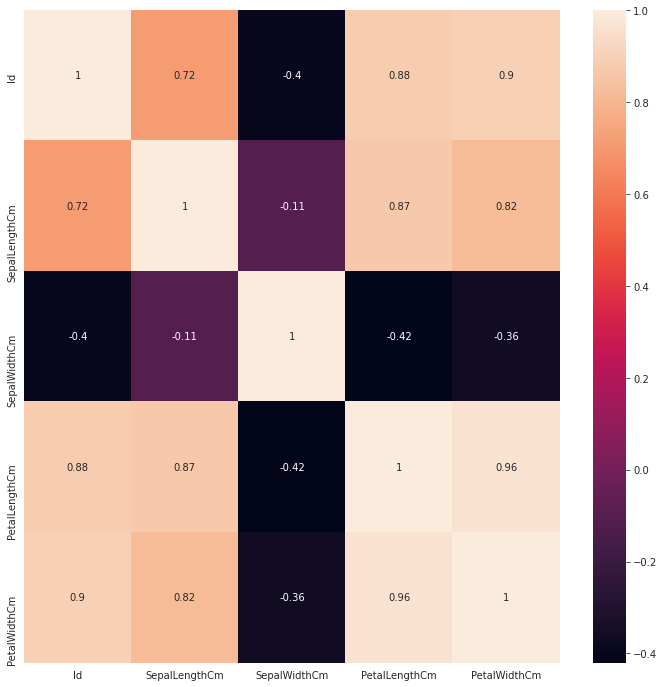

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

#  Data Preprocessing

In [ ]:
# features
X = df.drop(columns=['Id', 'Species'], axis=1)
# target
Y = df.Species
en = LabelEncoder()
Y = en.fit_transform(Y)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# KMeans Clusters

In [ ]:
from sklearn.cluster import KMeans
wc = []

In [ ]:
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, random_state=1)
  kmeans.fit(X)
  wc.append(kmeans.inertia_)

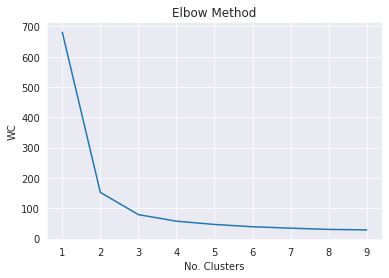

In [ ]:
sns.set_style("darkgrid")
plt.plot(range(1,10), wc)
plt.title("Elbow Method")
plt.xlabel('No. Clusters')
plt.ylabel('WC')
plt.show()

In [ ]:
# K = 3 as there's elbow corner at 3.
pred = KMeans(n_clusters=3, random_state=1)
Y_pred = pred.fit_predict(X)
X = X.values

# Cluster Visualization

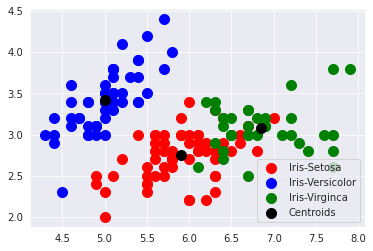

In [ ]:
plt.scatter(X[Y_pred == 0, 0], X[Y_pred == 0, 1], s=100, c='red', label='Iris-Setosa')
plt.scatter(X[Y_pred == 1, 0], X[Y_pred == 1, 1], s=100, c='blue', label='Iris-Versicolor')
plt.scatter(X[Y_pred == 2, 0], X[Y_pred == 2, 1], s=100, c='green', label='Iris-Virginca')

# Centroid
plt.scatter(pred.cluster_centers_[:,0], pred.cluster_centers_[:,1], s=100, c='black', label="Centroids")
plt.legend()
plt.show()